## 라이브러리 로딩

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [6]:
import sys
print(sys.executable)


c:\Users\user\Desktop\공부\데이터분석\.venv\Scripts\python.exe


## 데이터 로딩 및 확인

In [7]:
dataset = pd.read_csv('train.csv')
dataset.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833


In [8]:
dataset.shape

(273, 10)

In [9]:
dataset = pd.read_csv('train.csv')
dataset.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833


In [10]:
dataset.isnull().sum()[:10] #결측치 확인

date_time                    0
wind_direction               0
sky_condition                0
precipitation_form           0
wind_speed                   0
humidity                     0
low_temp                     0
high_temp                    0
Precipitation_Probability    0
number_of_rentals            0
dtype: int64

In [11]:
dataset_describe = dataset.describe()
dataset.describe()

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
count,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000
mean,202.750967,2.288256,0.100963,2.480963,56.745491,13.795249,23.384733,16.878103,59574.978022
std,56.659232,0.961775,0.203193,0.884397,12.351268,5.107711,5.204605,16.643772,27659.575774
min,57.047000,1.000000,0.000000,0.753000,24.831000,1.938000,9.895000,0.000000,1037.000000
25%,171.541000,1.405000,0.000000,1.820000,47.196000,9.938000,19.842000,4.054000,36761.000000
50%,209.774000,2.167000,0.000000,2.411000,55.845000,14.375000,24.158000,12.162000,63032.000000
75%,238.412000,3.000000,0.088000,2.924000,66.419000,18.000000,27.526000,22.973000,81515.000000
max,321.622000,4.000000,1.000000,5.607000,88.885000,22.312000,33.421000,82.162000,110377.000000


### 데이터 시각화

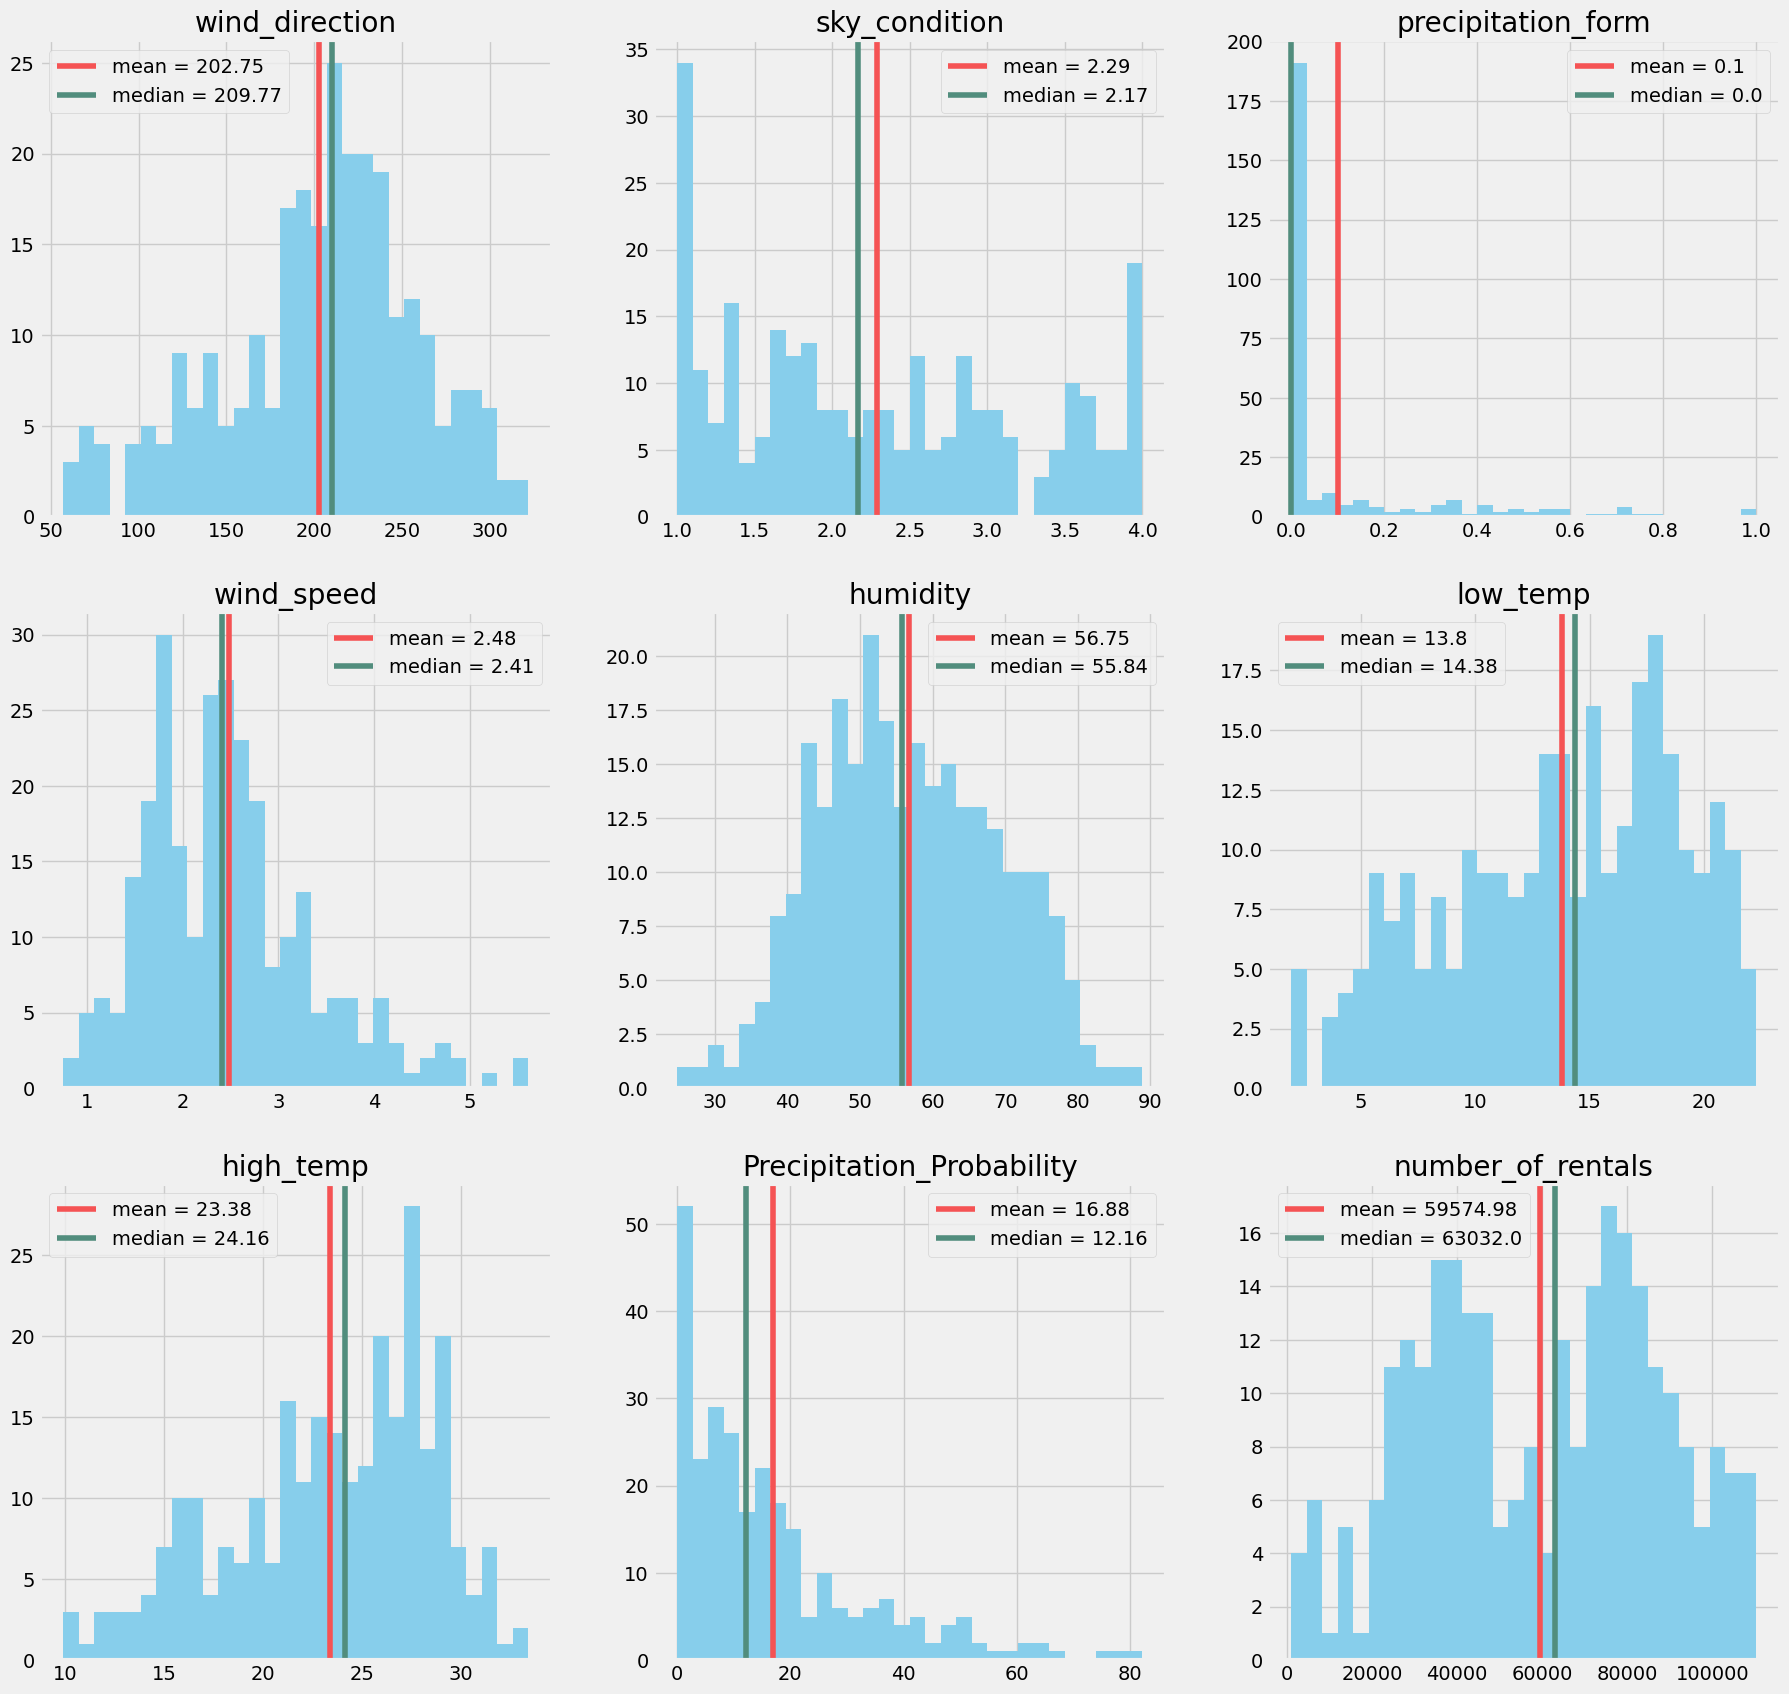

In [12]:
interest_col = ['wind_direction', 'sky_condition', 'precipitation_form', 'wind_speed', 'humidity', 'low_temp', 'high_temp', 'Precipitation_Probability', 'number_of_rentals']

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(3,3,figsize=(20,20))

column_idx = 0
for i in range(3):
    for j in range(3):
        ax[i][j].hist(dataset[interest_col[column_idx]], bins=30, color="skyblue")
        ax[i][j].set_title(interest_col[column_idx])
        ax[i][j].axvline(dataset_describe[interest_col[column_idx]]['mean'], c='#f55354',label = f"mean = {round(dataset_describe[interest_col[column_idx]]['mean'], 2)}")
        ax[i][j].axvline(dataset_describe[interest_col[column_idx]]['50%'], c='#518d7d', label = f"median = {round(dataset_describe[interest_col[column_idx]]['50%'], 2)}")
        ax[i][j].legend()
        
        column_idx += 1
        
        

- precipitation_form, Precipitation_Probability는 불균형 데이터이므로 전처리에 주의

- 온도 관련 변수는 계절성이 뚜렷하기에 년, 월, 일로 나누고 계절 별 변수 설정 + 요일도 지정해두면 도움이 될 듯함

- 분포가 다봉성인 변수는 클러스터링 혹은 비선형 모델 (Random Forest, XGBoost) 사용해보기

In [13]:
# 날짜데이터 년, 월, 일로 나누기
def sep_datetime(dataframe):
    year=[]
    month=[]
    day=[]
    
    for date in dataframe.date_time:
        year_point, month_point, day_point = date.split("-")
        year.append(int(year_point))
        month.append(int(month_point))
        day.append(int(day_point))
    return year, month, day

year, month, day = sep_datetime(dataset)

dataset['year'] = year
dataset['month'] = month
dataset['day'] = day

dataset

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month,day
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994,2018,4,1
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139,2018,4,2
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817,2018,4,3
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034,2018,4,4
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833,2018,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,2020-06-26,228.662,3.980,0.223,2.271,78.378,20.500,27.526,36.486,96150,2020,6,26
269,2020-06-27,207.770,2.865,0.081,1.794,78.412,20.812,28.842,21.081,107001,2020,6,27
270,2020-06-28,282.568,1.730,0.000,1.820,72.736,21.000,29.053,7.297,98568,2020,6,28
271,2020-06-29,137.027,2.257,0.088,2.043,70.473,19.625,26.000,15.541,70053,2020,6,29


In [14]:
# 요일 데이터 추가하기
week_day = pd.to_datetime(dataset['date_time']).dt.day_name()
dataset['week_day']=week_day
dataset

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month,day,week_day
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994,2018,4,1,Sunday
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139,2018,4,2,Monday
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817,2018,4,3,Tuesday
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034,2018,4,4,Wednesday
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833,2018,4,5,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,2020-06-26,228.662,3.980,0.223,2.271,78.378,20.500,27.526,36.486,96150,2020,6,26,Friday
269,2020-06-27,207.770,2.865,0.081,1.794,78.412,20.812,28.842,21.081,107001,2020,6,27,Saturday
270,2020-06-28,282.568,1.730,0.000,1.820,72.736,21.000,29.053,7.297,98568,2020,6,28,Sunday
271,2020-06-29,137.027,2.257,0.088,2.043,70.473,19.625,26.000,15.541,70053,2020,6,29,Monday


### 상관관계 분석하기
- Titanic에서 알게되었던 상관관계 분석해보기
- 숫자데이터만 사용해야 하는데, 문자데이터는 drop 혹은 encoding 으로 처리 후 사용

In [15]:
dataset_number = dataset.select_dtypes(np.number) # 상관관계는 숫자데이터만 사용이 가능함
dataset_number

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month,day
0,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994,2018,4,1
1,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139,2018,4,2
2,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817,2018,4,3
3,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034,2018,4,4
4,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833,2018,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
268,228.662,3.980,0.223,2.271,78.378,20.500,27.526,36.486,96150,2020,6,26
269,207.770,2.865,0.081,1.794,78.412,20.812,28.842,21.081,107001,2020,6,27
270,282.568,1.730,0.000,1.820,72.736,21.000,29.053,7.297,98568,2020,6,28
271,137.027,2.257,0.088,2.043,70.473,19.625,26.000,15.541,70053,2020,6,29


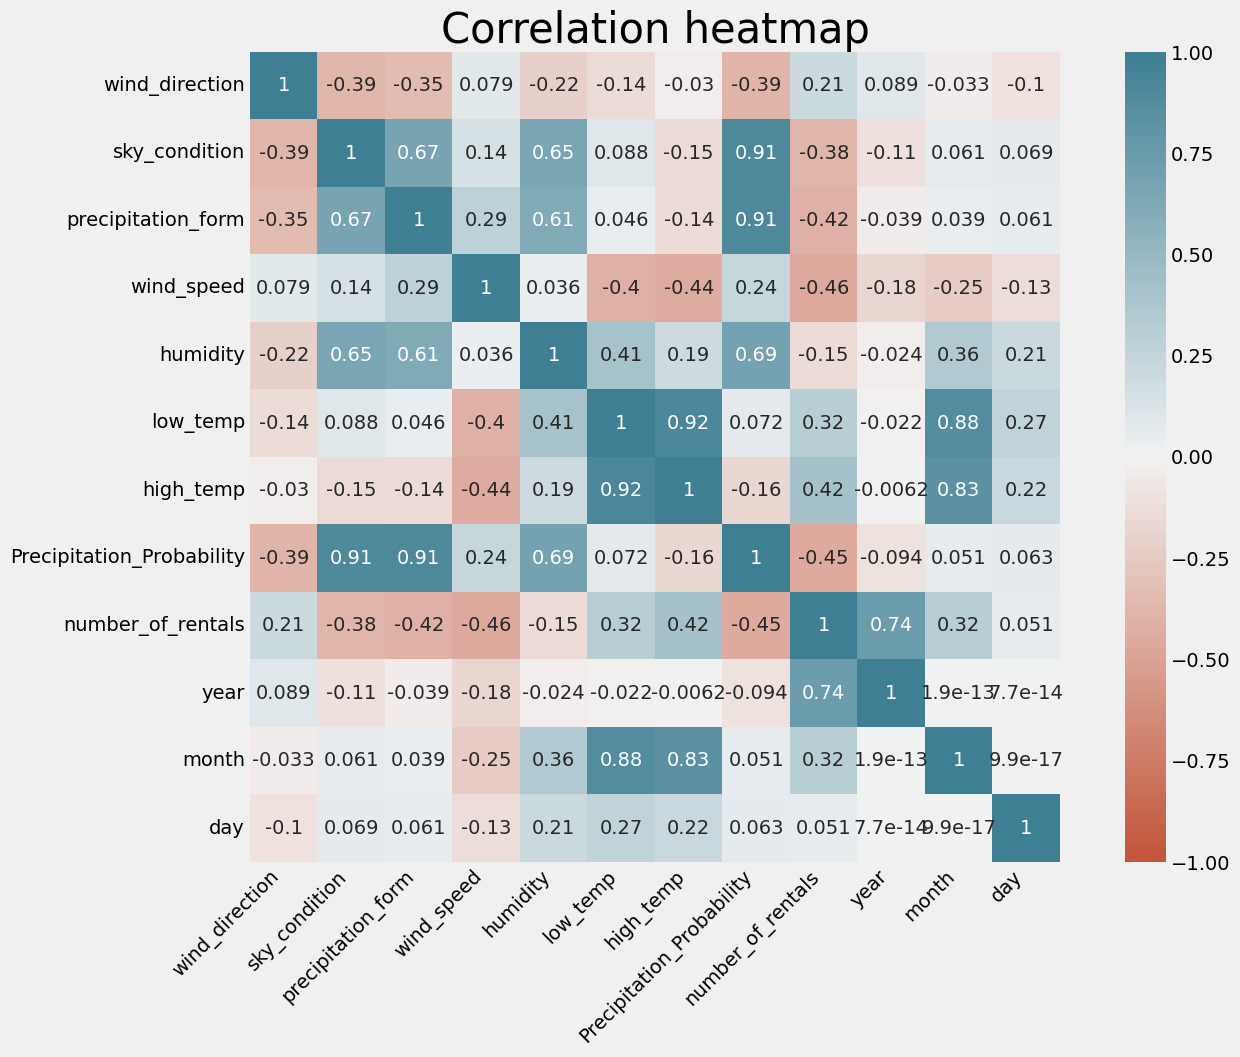

In [16]:
corr = dataset_number.corr()
plt.figure(figsize=(15, 10))

#히트맵 생성
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0, #색상 -1 ~ 1 까지
    cmap=sns.diverging_palette(20, 220, n=200),   # 색상 맵 지정
    square=True, #정사각형으로 표현
    annot=True   # 셀에 상관계수 값 표시
)

# X축 눈금 꾸미기
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

plt.title('Correlation heatmap', fontsize=30)
plt.show()

- year 상관관계가 가장 높다.

In [17]:
year_rentals = dataset.groupby('year').sum()['number_of_rentals']
month_rentals = dataset.groupby('month').sum()['number_of_rentals']
day_rentals = dataset.groupby('day').sum()['number_of_rentals']

In [18]:
dataset['month'].value_counts()

month
5    93
4    90
6    90
Name: count, dtype: int64

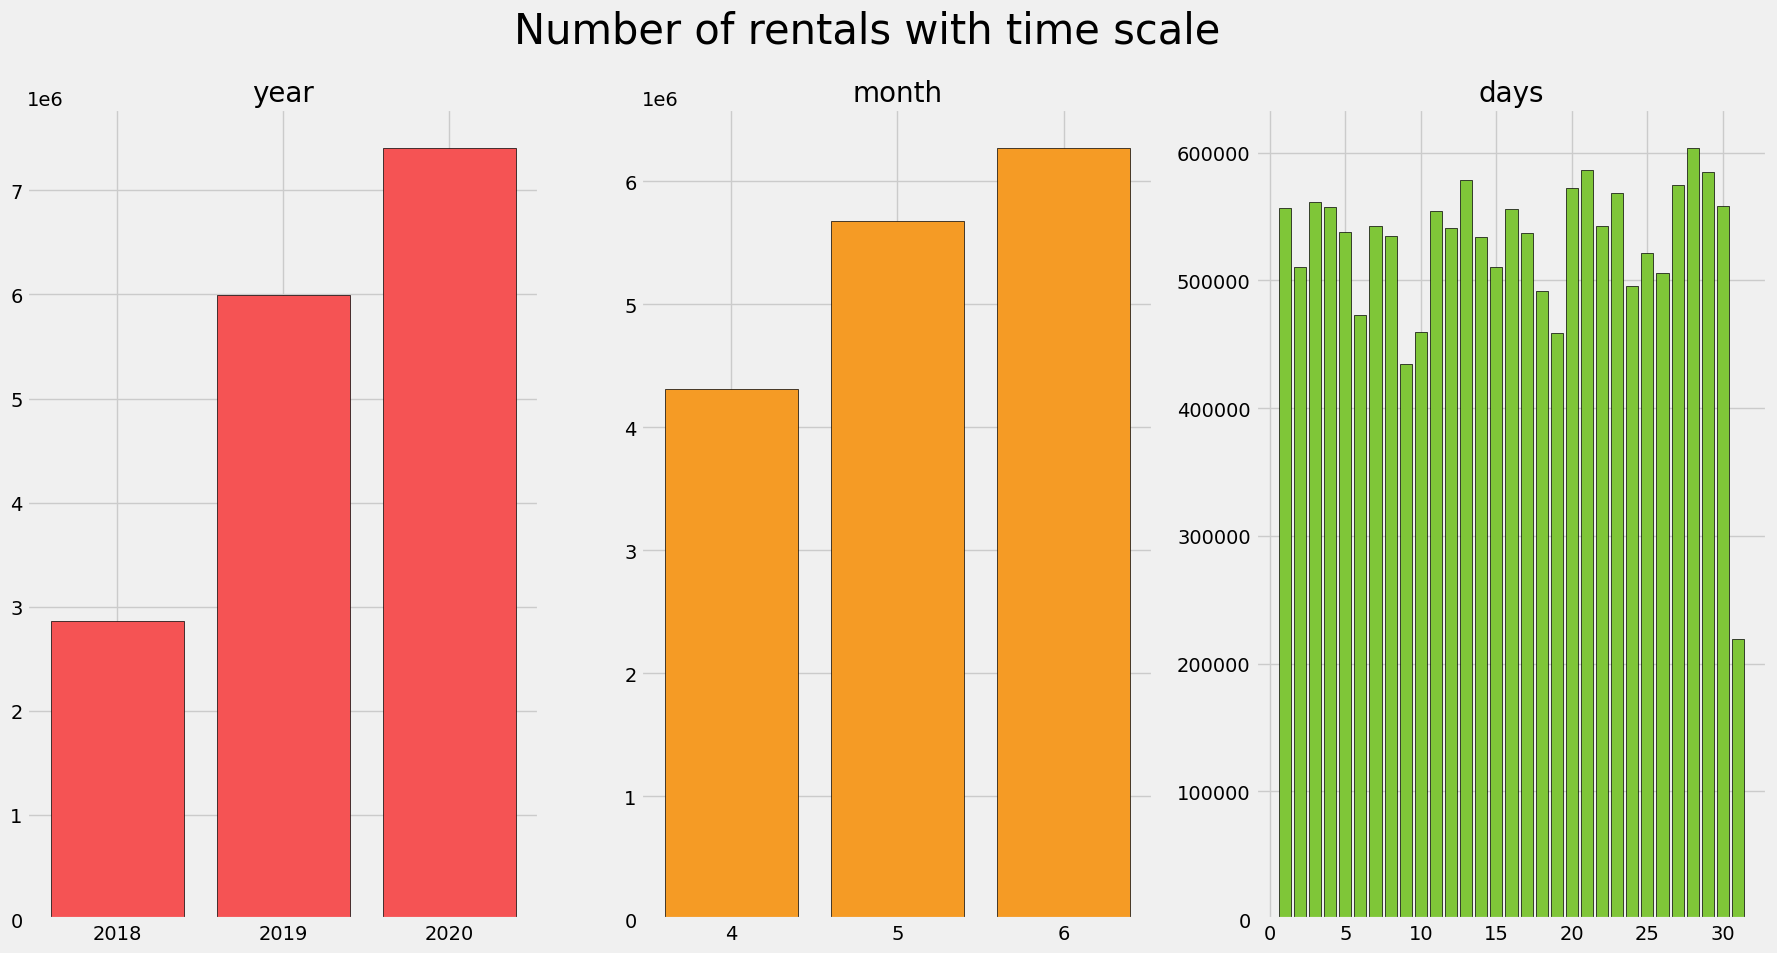

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
fig.suptitle('Number of rentals with time scale', fontsize=30)

ax[0].bar(x=['2018', '2019', '2020'], height=year_rentals, color='#f55354', edgecolor='black')
ax[0].set_title('year', fontsize = 20)

ax[1].bar(x = ['4', '5', '6'], height=month_rentals, color='#f59b25', edgecolor='black')
ax[1].set_title('month', fontsize = 20)

ax[2].bar(x=day_rentals.index.to_list(), height= day_rentals, color='#7fc638', edgecolor='black')
ax[2].set_title('days', fontsize = 20)

plt.show()

- Year: 2018 < 2019 < 2020 순으로 지속적인 증가 추세 -> 수요가 매년 증가함.
- month: Year과 마찬가지지만, 4 ~ 6월 순으로 증가하는 추세를 보니 수요가 증가하는건지, 달 별 사용량 차이가 있는지 검토
- day: 큰 변동이 없어보임

## 모델 정의 및 학습

In [20]:
X = dataset.drop(['date_time', 'number_of_rentals', 'week_day'],axis=1) #데이터 분리
y = dataset.number_of_rentals


In [21]:
from sklearn.linear_model import LinearRegression

origin_model = LinearRegression()
origin_model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
import sys
print(sys.executable)

c:\Users\user\Desktop\공부\데이터분석\.venv\Scripts\python.exe


In [23]:
def NMAE(true, pred):
    score = np.mean(np.abs(true-pred)/true) # 절대오차를 계산하고 실제값으로 나누어 정규화
    return score

In [24]:
y_pred = origin_model.predict(X)
NMAE(y, y_pred)



np.float64(0.3234797521201586)

#### 시각화

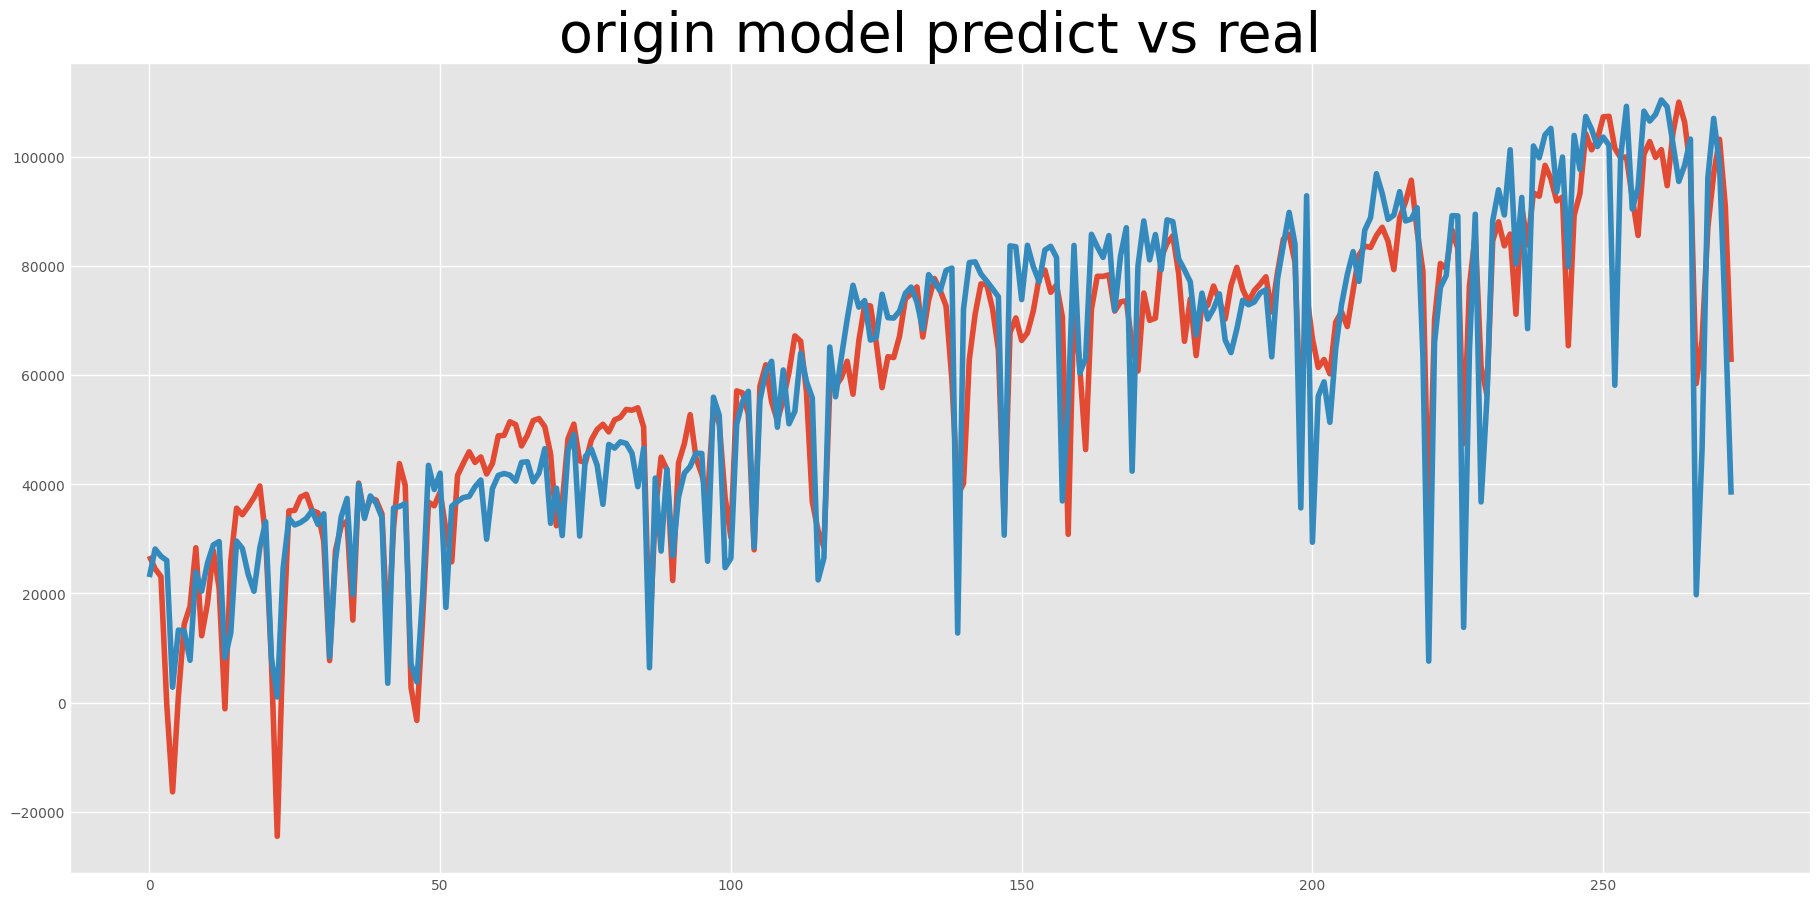

In [25]:
plt.style.use('ggplot')
plt.figure(figsize=(20,10))
plt.plot(y_pred, label='prediction')
plt.plot(y, label='real_data')
plt.title("origin model predict vs real", fontsize=40)
plt.show()

### Feature Engineering

In [26]:
# Weekend 인코딩
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(week_day)
X['week_day'] = le.transform(week_day)
X.head()

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,year,month,day,week_day
0,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,2018,4,1,3
1,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,2018,4,2,1
2,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,2018,4,3,5
3,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,2018,4,4,6
4,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2018,4,5,4


### Q. 어떨때 따릉이를 안 탈까? (0.32 -> 0.28)

1. 일교차가 너무 클때 (high_temp - low_temp)
2. 고온다습할때 (high_temp * humidity)
3. 춥고 바람 많이불때 (low_temp * wind_speed)
4. 비오고 흐릴때 (precipitation_form * sky_condition)

In [27]:
X['temp_gap'] = X['high_temp'] - X['low_temp']
X['humidity_high'] = X['high_temp'] * X['humidity']
X['cold_wind_high'] = X['low_temp'] * X['wind_speed']
X['rain_cloud'] = X['precipitation_form'] * X['sky_condition']

X.head()

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,year,month,day,week_day,temp_gap,humidity_high,cold_wind_high,rain_cloud
0,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,2018,4,1,3,8.400,1575.000000,38.430000,0.0000
1,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,2018,4,2,1,6.188,1326.827000,41.997736,0.0000
2,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,2018,4,3,5,5.004,1146.846764,27.739280,0.0000
3,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,2018,4,4,6,4.056,888.628432,26.083056,1.5691
4,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2018,4,5,4,4.546,768.903064,18.717750,2.8920


In [28]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
score = NMAE(y, y_pred)
score

np.float64(0.2896317682396884)

#### 기계판단 (0.32 -> 0.14)
- 컴퓨터 단순 계산으로 feature끼리 다 곱해서 새로운 변수로 추가해버리기

In [29]:
X_com = dataset.copy()
X_com =X_com.drop(['date_time', 'number_of_rentals'], axis=1)

In [30]:
# Weekend 인코딩
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(week_day)
X_com['week_day'] = le.transform(week_day)
X_com.head()

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,year,month,day,week_day
0,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,2018,4,1,3
1,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,2018,4,2,1
2,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,2018,4,3,5
3,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,2018,4,4,6
4,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2018,4,5,4


In [31]:
col_list = X_com.columns

for i in range(len(col_list)):
    for j in range(i, len(col_list)):
        X_com[f'{col_list[i]}*{col_list[j]}'] = X_com[col_list[i]] * X_com[col_list[j]]

X_com

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,year,month,...,year*year,year*month,year*day,year*week_day,month*month,month*day,month*week_day,day*day,day*week_day,week_day*week_day
0,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,2018,4,...,4072324,8072,2018,6054,16,4,12,1,3,9
1,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,2018,4,...,4072324,8072,4036,2018,16,8,4,4,2,1
2,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,2018,4,...,4072324,8072,6054,10090,16,12,20,9,15,25
3,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,2018,4,...,4072324,8072,8072,12108,16,16,24,16,24,36
4,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2018,4,...,4072324,8072,10090,8072,16,20,16,25,20,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,228.662,3.980,0.223,2.271,78.378,20.500,27.526,36.486,2020,6,...,4080400,12120,52520,0,36,156,0,676,0,0
269,207.770,2.865,0.081,1.794,78.412,20.812,28.842,21.081,2020,6,...,4080400,12120,54540,4040,36,162,12,729,54,4
270,282.568,1.730,0.000,1.820,72.736,21.000,29.053,7.297,2020,6,...,4080400,12120,56560,6060,36,168,18,784,84,9
271,137.027,2.257,0.088,2.043,70.473,19.625,26.000,15.541,2020,6,...,4080400,12120,58580,2020,36,174,6,841,29,1


In [32]:
model = LinearRegression()
model.fit(X_com, y)
y_pred = model.predict(X_com)
score = NMAE(y, y_pred)
score

np.float64(0.1400626467058196)

#### 사람판단 + 기계판단 (0.32 -> 0.10) wow

In [33]:
X_col = dataset.copy()
X_col = X_col.drop(['date_time', 'number_of_rentals'], axis=1)
X_col

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,year,month,day,week_day
0,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,2018,4,1,Sunday
1,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,2018,4,2,Monday
2,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,2018,4,3,Tuesday
3,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,2018,4,4,Wednesday
4,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2018,4,5,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...
268,228.662,3.980,0.223,2.271,78.378,20.500,27.526,36.486,2020,6,26,Friday
269,207.770,2.865,0.081,1.794,78.412,20.812,28.842,21.081,2020,6,27,Saturday
270,282.568,1.730,0.000,1.820,72.736,21.000,29.053,7.297,2020,6,28,Sunday
271,137.027,2.257,0.088,2.043,70.473,19.625,26.000,15.541,2020,6,29,Monday


In [34]:
# Weekend 인코딩
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(week_day)
X_col['week_day'] = le.transform(week_day)
X_col.head()

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,year,month,day,week_day
0,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,2018,4,1,3
1,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,2018,4,2,1
2,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,2018,4,3,5
3,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,2018,4,4,6
4,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2018,4,5,4


In [35]:
X_col['temp_gap'] = X_col['high_temp'] - X_col['low_temp']
X_col['humidity_high'] = X_col['high_temp'] * X_col['humidity']
X_col['cold_wind_high'] = X_col['low_temp'] * X_col['wind_speed']

X_col.head()

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,year,month,day,week_day,temp_gap,humidity_high,cold_wind_high
0,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,2018,4,1,3,8.400,1575.000000,38.430000
1,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,2018,4,2,1,6.188,1326.827000,41.997736
2,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,2018,4,3,5,5.004,1146.846764,27.739280
3,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,2018,4,4,6,4.056,888.628432,26.083056
4,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2018,4,5,4,4.546,768.903064,18.717750


In [36]:
col_list = X_col.columns

for i in range(len(col_list)):
    for j in range(i, len(col_list)):
        X_col[f'{col_list[i]}*{col_list[j]}'] = X_col[col_list[i]] * X_col[col_list[j]]

X_com

C:\Users\user\AppData\Local\Temp\ipykernel_13704\138522488.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_col[f'{col_list[i]}*{col_list[j]}'] = X_col[col_list[i]] * X_col[col_list[j]]
C:\Users\user\AppData\Local\Temp\ipykernel_13704\138522488.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_col[f'{col_list[i]}*{col_list[j]}'] = X_col[col_list[i]] * X_col[col_list[j]]
C:\Users\user\AppData\Local\Temp\ipykernel_13704\138522488.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of call

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,year,month,...,year*year,year*month,year*day,year*week_day,month*month,month*day,month*week_day,day*day,day*week_day,week_day*week_day
0,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,2018,4,...,4072324,8072,2018,6054,16,4,12,1,3,9
1,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,2018,4,...,4072324,8072,4036,2018,16,8,4,4,2,1
2,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,2018,4,...,4072324,8072,6054,10090,16,12,20,9,15,25
3,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,2018,4,...,4072324,8072,8072,12108,16,16,24,16,24,36
4,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2018,4,...,4072324,8072,10090,8072,16,20,16,25,20,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,228.662,3.980,0.223,2.271,78.378,20.500,27.526,36.486,2020,6,...,4080400,12120,52520,0,36,156,0,676,0,0
269,207.770,2.865,0.081,1.794,78.412,20.812,28.842,21.081,2020,6,...,4080400,12120,54540,4040,36,162,12,729,54,4
270,282.568,1.730,0.000,1.820,72.736,21.000,29.053,7.297,2020,6,...,4080400,12120,56560,6060,36,168,18,784,84,9
271,137.027,2.257,0.088,2.043,70.473,19.625,26.000,15.541,2020,6,...,4080400,12120,58580,2020,36,174,6,841,29,1


In [37]:
model = LinearRegression()
model.fit(X_col, y)
y_pred = model.predict(X_col)
score = NMAE(y, y_pred)
score

np.float64(0.10278795790531291)

### 데이터 상관관계 기반 처리 후 학습해보기

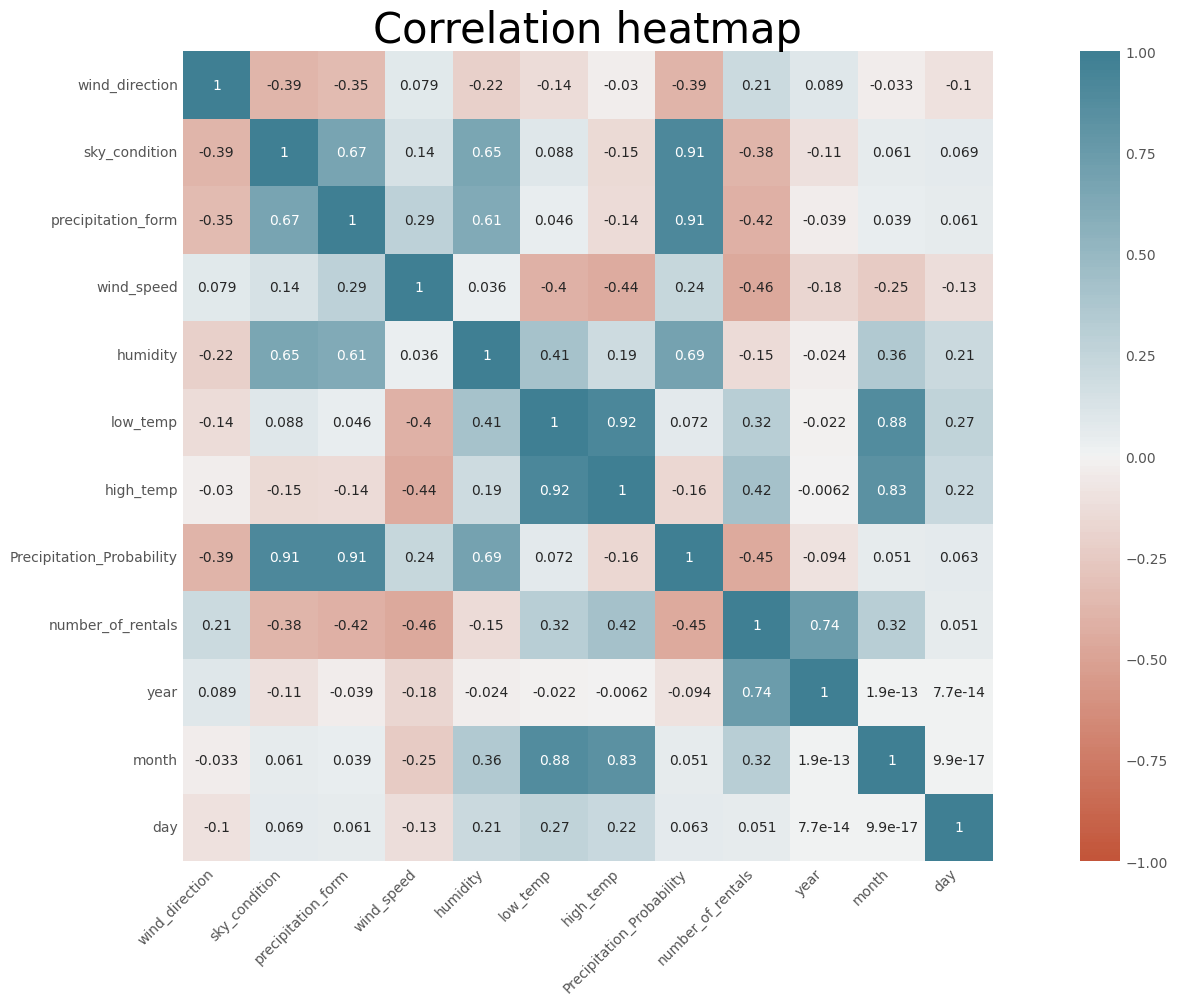

In [38]:
corr = dataset_number.corr()
plt.figure(figsize=(20, 10))

#히트맵 생성
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0, #색상 -1 ~ 1 까지
    cmap=sns.diverging_palette(20, 220, n=200),   # 색상 맵 지정
    square=True, #정사각형으로 표현
    annot=True   # 셀에 상관계수 값 표시
)

# X축 눈금 꾸미기
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

plt.title('Correlation heatmap', fontsize=30)
plt.show()

In [39]:
# 상관관계가 0에 가까운 것 다 빼보기
X_d = dataset.copy()
X_d = X_d.drop(['date_time', 'humidity', 'wind_direction', 'day', 'number_of_rentals'], axis=1)

# Weekend 인코딩
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(week_day)
X_d['week_day'] = le.transform(week_day)
X_d.head()


,sky_condition,precipitation_form,wind_speed,low_temp,high_temp,Precipitation_Probability,year,month,week_day
0,4.000,0.000,3.050,12.600,21.000,30.000,2018,4,3
1,2.950,0.000,3.278,12.812,19.000,19.500,2018,4,1
2,2.911,0.000,2.690,10.312,15.316,19.113,2018,4,5
3,3.692,0.425,3.138,8.312,12.368,43.493,2018,4,6
4,4.000,0.723,3.186,5.875,10.421,63.378,2018,4,4


In [40]:
X_d['temp_change'] = X_d['high_temp'] - X_d['low_temp']
X_d['cold_wind_high'] = X_d['low_temp'] * X_d['wind_speed']


X_d.head()

,sky_condition,precipitation_form,wind_speed,low_temp,high_temp,Precipitation_Probability,year,month,week_day,temp_change,cold_wind_high
0,4.000,0.000,3.050,12.600,21.000,30.000,2018,4,3,8.400,38.430000
1,2.950,0.000,3.278,12.812,19.000,19.500,2018,4,1,6.188,41.997736
2,2.911,0.000,2.690,10.312,15.316,19.113,2018,4,5,5.004,27.739280
3,3.692,0.425,3.138,8.312,12.368,43.493,2018,4,6,4.056,26.083056
4,4.000,0.723,3.186,5.875,10.421,63.378,2018,4,4,4.546,18.717750


In [41]:
col_list = X_d.columns

for i in range(len(col_list)):
    for j in range(i, len(col_list)):
        X_d[f'{col_list[i]}*{col_list[j]}'] = X_d[col_list[i]] * X_d[col_list[j]]

X_d

,sky_condition,precipitation_form,wind_speed,low_temp,high_temp,Precipitation_Probability,year,month,week_day,temp_change,...,month*month,month*week_day,month*temp_change,month*cold_wind_high,week_day*week_day,week_day*temp_change,week_day*cold_wind_high,temp_change*temp_change,temp_change*cold_wind_high,cold_wind_high*cold_wind_high
0,4.000,0.000,3.050,12.600,21.000,30.000,2018,4,3,8.400,...,16,12,33.600,153.720000,9,25.200,115.290000,70.560000,322.812000,1476.864900
1,2.950,0.000,3.278,12.812,19.000,19.500,2018,4,1,6.188,...,16,4,24.752,167.990944,1,6.188,41.997736,38.291344,259.881990,1763.809829
2,2.911,0.000,2.690,10.312,15.316,19.113,2018,4,5,5.004,...,16,20,20.016,110.957120,25,25.020,138.696400,25.040016,138.807357,769.467655
3,3.692,0.425,3.138,8.312,12.368,43.493,2018,4,6,4.056,...,16,24,16.224,104.332224,36,24.336,156.498336,16.451136,105.792875,680.325810
4,4.000,0.723,3.186,5.875,10.421,63.378,2018,4,4,4.546,...,16,16,18.184,74.871000,16,18.184,74.871000,20.666116,85.090891,350.354165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,3.980,0.223,2.271,20.500,27.526,36.486,2020,6,0,7.026,...,36,0,42.156,279.333000,0,0.000,0.000000,49.364676,327.098943,2167.414580
269,2.865,0.081,1.794,20.812,28.842,21.081,2020,6,2,8.030,...,36,12,48.180,224.020368,4,16.060,74.673456,64.480900,299.813926,1394.031258
270,1.730,0.000,1.820,21.000,29.053,7.297,2020,6,3,8.053,...,36,18,48.318,229.320000,9,24.159,114.660000,64.850809,307.785660,1460.768400
271,2.257,0.088,2.043,19.625,26.000,15.541,2020,6,1,6.375,...,36,6,38.250,240.563250,1,6.375,40.093875,40.640625,255.598453,1607.518813


In [42]:
model = LinearRegression()
model.fit(X_d, y)
y_pred = model.predict(X_d)
score = NMAE(y, y_pred)
score

np.float64(0.14037103637482337)